In [25]:
import os

os.chdir("/home/pauloyun/Documentos/model-canastra/pyDEA/pydea")

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dea as dea
import tools
import plot
import pandas as pd
import pulp

%matplotlib inline

In [30]:
# https://github.com/jzuccollo/pyDEA

# https://github.com/jzuccollo/pyDEA/blob/master/pydea/examples/Simple%20university%20example.ipynb

#https://araith.github.io/pyDEA/DEApy_usage.html

In [142]:
inputs = pd.DataFrame([[100, 70], [120, 123], [50, 20], [67, 17], [98, 20], [500, 100]], columns=['Teaching staff', 'Research staff'])
outputs = pd.DataFrame([[1540, 154, 59], [1408, 186, 23 ], [690, 59, 76], [674, 73, 90], [1686, 197, 12], [5000, 5000, 5000]], columns=['Undergraduates', 'Masters', 'Publications'])
env_vars = pd.DataFrame([[  5.15262633e+00,   5.25431862e+03],
       [  5.15262633e+00,   1.10390901e+04],
       [  5.15262633e+00,   5.88356035e+03],
       [  5.15262633e+00,   1.54834181e+03],
       [  5.15262633e+00,   1.40433297e+04],
       [  5.15262633e+00,   3.75047428e+03]], columns=['Funding', 'City_size'])


pd.concat([inputs,outputs,env_vars],axis=1)

,Teaching staff,Research staff,Undergraduates,Masters,Publications,Funding,City_size
0,100,70,1540,154,59,5.152626,5254.31862
1,120,123,1408,186,23,5.152626,11039.09010
2,50,20,690,59,76,5.152626,5883.56035
3,67,17,674,73,90,5.152626,1548.34181
4,98,20,1686,197,12,5.152626,14043.32970
5,500,100,5000,5000,5000,5.152626,3750.47428


In [151]:
uni_prob = dea.DEAProblem(pd.concat([inputs,env_vars],axis=1), outputs, returns='CRS')

In [177]:
myresults = uni_prob.solve()

In [178]:
myresults['Efficiency']

0    1.000000
1    0.772789
2    0.864829
3    0.902248
4    1.000000
5    1.000000
Name: Efficiency, dtype: float64

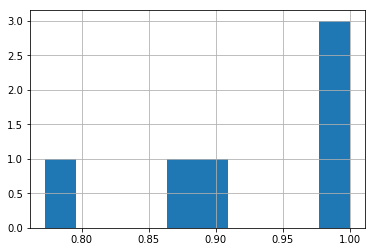

In [154]:
myresults['Efficiency'].hist()

In [161]:
myresults['Weights']

,in_City_size,in_Funding,in_Research staff,in_Teaching staff,out_Masters,out_Publications,out_Undergraduates
0,0.000013,0.000000,0.000000,0.009322,0.0000,0.000000,0.000649
1,0.000010,0.060748,0.000000,0.004786,0.0000,0.000000,0.000549
2,0.000021,0.000000,0.000000,0.017572,0.0000,0.000584,0.001189
3,0.000071,0.000000,0.008082,0.011239,0.0000,0.000000,0.001339
4,0.000000,0.000000,0.000000,0.010204,0.0000,0.000000,0.000593
5,0.000000,0.000000,0.000000,0.002000,0.0002,0.000000,0.000000


Text(0.5, 1.0, 'Distribution of efficiency scores')

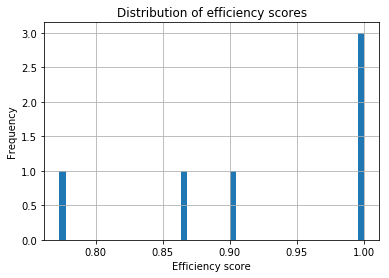

In [163]:
myresults['Efficiency'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('Efficiency score')
plt.title('Distribution of efficiency scores')

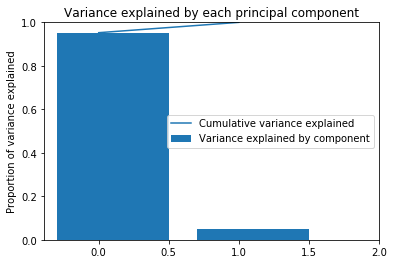

In [164]:
indat_pca = tools.deaPCA(pd.concat([inputs],axis=1))

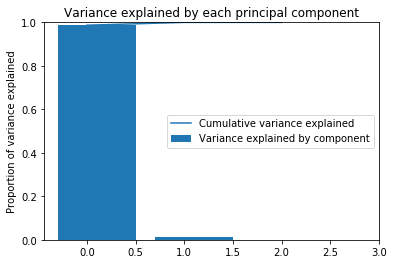

In [165]:
outdat_pca = tools.deaPCA(pd.concat([outputs],axis=1))

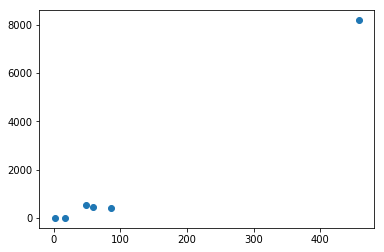

In [166]:
plt.scatter(indat_pca.T.values[0],outdat_pca.T.values[0])

In [167]:
%%time
pcaDEA = dea.DEAProblem(indat_pca.iloc[:,:2], outdat_pca.iloc[:,:2], returns='CRS')

CPU times: user 6.29 ms, sys: 851 µs, total: 7.14 ms
Wall time: 7.04 ms


In [168]:
%%time
pcaResults = pcaDEA.solve()

CPU times: user 13.6 ms, sys: 38.5 ms, total: 52.2 ms
Wall time: 106 ms


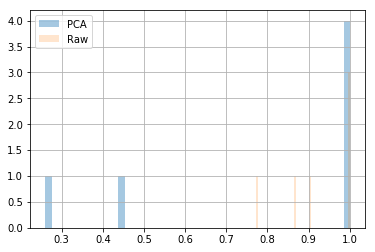

In [169]:
fig1, ax1 = plt.subplots()
pcaResults['Efficiency'].hist(bins=50, ax=ax1, alpha=0.4)
myresults['Efficiency'].hist(bins=50, ax=ax1, alpha=0.2)
plt.legend(['PCA', 'Raw'])